# Week 11: Network Visualisation

Once your model has been created, you will need to visualise your work to your audiences. This week we will look into how to visualise network. 

## Drill

What are the differences between `for` and `while` loop?

* `while` loop requires a counter initiated, if applicable.
* `while` loop requires the counter to be increased explicitly.
* `for` loop does not change the objects inside the loop back to outside.

What is the difference between supervised and unsupervised learning?

Supervised learning trains with a target variable while unsupervised does not. So they look for patterns within data. 

## Terminologies of Network

Network is a visual representation of linked objects. An example of network is shown in below: 

<img src="fig/Network.png"/>

Network is composed of __nodes__ and connected by __links__ (sometimes called __edges__ from graph theory). For example, 
* A person represents a node
* Relationships link each person

__Exercise:__ What would be nodes or links/ edges in the following situation? 
* During an epidemic. 
* Your friends and aquaintances on social media. 
* Organisation chart. 
* Genetic interations of E Coli. 
* Traffic flow of Sydney.

__Solution__

| __Question__ | __Node__ | __Link__              |
|--------------|----------|-----------------------|
| 1            | Person   | Interactions          |
| 2            | Person   | Relationships         |
| 3            | Staff    | Work relationships    |
| 4            | Operons  | Transcription factors |
| 5            | Place    | Road/ rail/ air link  |

We can also make variants to network links by adding weights into them. This is presented as numerical labels into the links. 

<img src="fig/NetworkWeight.png"/>

As you can see from the figure above, the left edge is heavier than the right edge. Weights are important when we would like to characterise the interactions and compare them. For example, it can mean how significant is our relationships compared to our other friends. 

### Network Types: Undirected, Directed, Multigraph

Links can be tailored to represent different types of relationships. For example, one way roads is represented as an arrow from onw node to another, but the opposite direction. This is a __directed graph__. The type of networks where its links does not have a direction are called __undirected__ graphs. These link represents the interactions are bidirectional. 

There is a type of network called multigraph, which means there are not only one way to link from a node to another. For example, from you can either walk or take a bus to university. Each modes of transport are represented by one link. 

<img src="fig/NetworkType.png"/>

__Exercise:__ Give examples if the following situations could be modelled as directed, multigraph or undirected networks?

* Local road traffic network
* State highway traffic network
* Social relationships

__Solution__

| __Question__ | __Situation__                   | __Link__              |
|--------------|---------------------------------|-----------------------|
| 1            | Local road traffic network      | Directed              |
| 2            | State highway traffic network   | Undirected            |
| 3            | Social relationships            | Undirected            |

### Network Science Quantities and Metrics

A network is complex in its topologies. So at its first glance it is not intuitive to describe a network quantitatively. Fortunately, network science has brought in many ideas from graph theory (from mathematics). The following summarises the quantative features from graph theory: 
* __Degree__ The number of links connected to a node. 
* __Distance__ We treat each link has length $1$. 
* __Diameter__ This is the longest shortest path from a node to another in one network/ graph. 
* __Complete graph__ All nodes are directly linked one another. 
* __Path__ All viable sequences between two nodes. For example, between nodes $A$ and $B$ is node $C$. So the paths between nodes $A$ and $B$ are $A\;-\;B$, $B\;-\;C$ and $A\;-\;C$. 
* __Cycle__ A composite path that will run back to the same node without other nodes bypassed twice (or more). 

These basic measurements are important to further infer from the network. Furthermore, we can interpolate more social aspects of network. For example, __homophily__ and __weak ties__ shows how close the people (nodes) are located. Homophily means the similarlity between people. Weak ties often describes two acquaintences, it is important because in reality we met much more acquaintences than close friends and family members. Acquaintences are very helpful in resource refer or sharing and this is one of the topic of the connections between social science and network science. We can also identify __communities__ with a social network. Communities are a group of people whom they share resources and membership of the same. In network science, we develop several metrics to infer these qualitative ideas. For example, 

* __Closeness__ This is to measure how near are all nodes. For example, if all nodes are directly linked, the network is obviously closed together. 
* __Betweenness__ Imagine the links have flow inside them. This measures how often the link is occupied by measure the number of shortest paths passing through the link. 
* __Assortativity__ This is to find out if people are prefered to attached to others. This metric measures the degrees of each node and measure how they correlated with their neighbours. 
* __PageRank__ Famous for the ranking search results by Google. One intuition is that imagine a person randomly pass through different pages, linked by hyperlinks. The page's popularity is measured by how many in-links to the page itself. 


So let us start coding with network using `NetworkX` in below. 

## NetworkX

NetworkX is a Python popular package in visualising and analysing data. To initiate the network analysis using NetworkX, we use 
```python
import networkx as nx
```
When analysing networks, it is best to visualise them. To do so, we can use `matplotlib` to plot the network. This is done by 
```python
from matlibplot import pyplot as plt
%matplotlib inline 
```

### Generating Networks

In Python, networks are its own data type. We start using `networkx` by creating the network object. This can be done by 
```python 
# Undirected graph
undirected_graph = nx.Graph()

# Directed graph
directed_graph = nx.DiGraph()

# Multigraph
multi_graph = nx.MultiGraph()
multi_digraph = nx.MultiDiGraph()
```

The empty bracket does not need to be blank. Rather, we can fill in the nodes and edges in the bracket. For example, if node $1$ is linked with node $2$. Then we write 
```python
g = nx.Graph([(1,2)])
```
Where `g` is a conventional name for graphs when we coding in Python. 

If we have created the network already. That is fine, we can still add the edges by 
```python
# Network `g` has created.
g.add_nodes_from([(1,2)])
```

If the network has more than one links, we input multiple tuples as additional edges. For example, nodes $1$ are linked with nodes $3$ and $4$. So we write 
```python
# Using the same example
# Create network from scratch
g = nx.Graph([(1,2), (1,3), (1,4)])
```

```python
# Using the same example
# Add new links
g.add_nodes_from([(1,3), (1,4)])
```

Of course, `networkx` has `Graph.add_node()` and `Graph.add_nodes_from([(u1,v1),(u2,v2)])` methods to add the nodes without connecting with the network. 

<img src="fig/Network_Create.png"/>

__Exercise:__ Write a code that create a network as shown in the figure above. 

In [ ]:
# Your code 
import networkx as nx

g = 

In [ ]:
# Solution
import networkx as nx

g = nx.Graph([(1,2),(1,3),(2,4),(3,4),(3,5),(2,6),(2,7)])

Let's dig deep into a network object. If we simply print the `g` as in below, we can see that it is a `Graph` object. 

In [5]:
import networkx as nx

g = nx.Graph([(1,2),(1,3),(2,4),(3,4),(3,5),(2,6),(2,7)])

g

So let's look at what is inside there by printing the contents within `g`. 

In [6]:
import networkx as nx

g = nx.Graph([(1,2),(1,3),(2,4),(3,4),(3,5),(2,6),(2,7)])

g.__dict__

{'node_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}},
 '_adj': {1: {2: {}, 3: {}},
  2: {1: {}, 4: {}, 6: {}, 7: {}},
  3: {1: {}, 4: {}, 5: {}},
  4: {2: {}, 3: {}},
  5: {3: {}},
  6: {2: {}},
  7: {2: {}}}}

You should see there is a dictionary printing the information of `g`. In particular: 
* `'_node'` represents what are the nodes inside `g`
* `'_adj'`  prints the neighbours of each nodes connected to. 

These information are very useful in inferring networks. We will do some exercises later using these. 

### Visualising Networks

With the help of `matplotlib`, we can visualise networks easily. This is done by the network methods in `networkx`. In particular, 
```python
g = nx.Graph([(1,2), (2,3), (1,3)])
nx.draw(g)
```

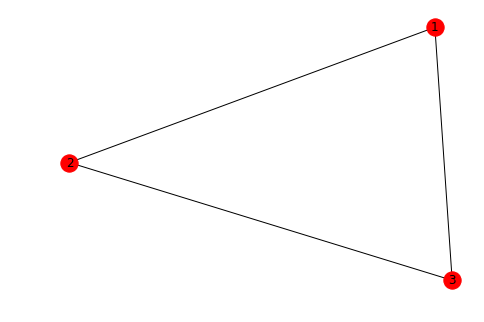

In [10]:
# Try me
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

g = nx.Graph([(1,2), (2,3), (1,3)])
nx.draw(g, with_labels=True)

__Exercise:__ Write a code that will visualise the given network `sample_network`. 

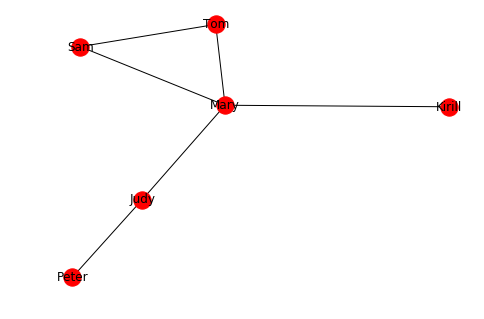

In [14]:
# Solution 

# Libraries
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

# Import data
from files.sample_network import g as sample_network

nx.draw(sample_network, with_labels=True)

In [ ]:
# Libraries
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

# Import data
from files.sample_network import g as sample_network

# Your code below



__Exercise:__ After you have visualised `sample_network`. Write code to answer the following questions: 
* How many nodes are there?
* What are the degrees for each node?
* Which nodes are singletons (i.e. nodes with $1$ degree)

In [20]:
# Solution

## Number of nodes
print('There are {} nodes. '.format(len(sample_network.nodes)))

## Degree
print('Degree distribution: {} '.format(sample_network.degree))

## Number of singletons 
number_of_singletons = 0

for degree_info in sample_network.degree: 
    if degree_info[1] == 1: 
        number_of_singletons += 1
print('There are {} singleton(s).'.format(number_of_singletons))

There are 6 nodes. 
Degree distribution: [('Mary', 4), ('Sam', 2), ('Judy', 2), ('Tom', 2), ('Kirill', 1), ('Peter', 1)] 
There are 2 singleton(s).


In [ ]:
# Your code below


`.draw()` and other similar methods have different options to customise the network. If you are interested, the following are the documentations regarding to these: 

* [`.draw_networkx()` documentation](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)
* [`networkx` graph examples](https://networkx.github.io/documentation/latest/auto_examples/index.html) Contains some styling examples for reference. 

### Infer Simple Network Quantities

__Exercise:__ Loop through all nodes in the provided network and print the name of each nodes. Each nodes are represented by an integer, so you can simply print the node itself. 

In [ ]:
# Solution
for node in g.nodes: 
    print(node.name)

In [ ]:
# Your code below


### Closeness 

Measure of how close are the nodes. In `networkx` this is calculated by 
```python
from networkx.algorithms.centrality import closeness_centrality

closeness_centrality(g)
```

You can check more information of the method on [official documentation](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality). 

We can run a simple example below: 

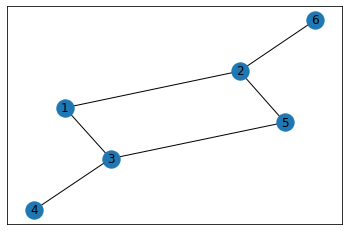

The closeness centrality of g1 are:
 {1: 0.625, 2: 0.625, 3: 0.625, 5: 0.625, 4: 0.4166666666666667, 6: 0.4166666666666667}


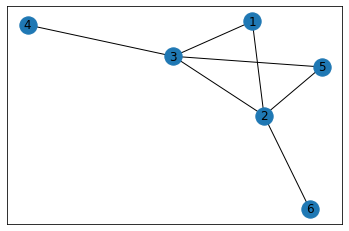

The closeness centrality of g2 are:
 {1: 0.625, 2: 0.8333333333333334, 3: 0.8333333333333334, 5: 0.625, 4: 0.5, 6: 0.5}


In [8]:
# Run me
from matplotlib import pyplot as plt
%matplotlib inline

import networkx as nx
from networkx.algorithms.centrality import closeness_centrality

g1 = nx.Graph([(1,2),(1,3),(2,5),(3,4),(3,5),(2,6)])
value_01 = closeness_centrality(g1)

g2 = nx.Graph([(1,2),(1,3),(2,3),(2,5),(3,4),(3,5),(2,6)])
value_02 = closeness_centrality(g2)

nx.draw_networkx(g1)
plt.show()
print('The closeness centrality of g1 are:\n {}'.format(value_01))

nx.draw_networkx(g2)
plt.show()
print('The closeness centrality of g2 are:\n {}'.format(value_02))

As you can see the values from closeness centrality is a dictionary of each node's closeness centrality. 

### Betweenness

Measure of how many shortest paths for the specific vertex has. In terms of traffic, we can think of how a road is popular because many cars can take this as the shortpath. 

In `networkx` this is calculated by 
```python
from networkx.algorithms.centrality import betweenness_centrality

betweenness_centrality(g)
```

You can check more information of the method on [official documentation](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality). 

### Assortativity

Measure of how each nodes are mixed with other nodes. Technically speaking, how well nodes are connected with each other. It is a ranged value from $-1$ to $1$: 
* Negative values mean disortative, the network is likely to look radial. 
* $0$ means the newtork is neutral.
* Positive values mean assortative. 

In `networkx` this is calculated by 
```python
from networkx.algorithms.assortativity import degree_assortativity_coefficient

degree_assortativity_coefficient(g)
```

You can check more information of the method on [official documentation](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient). 

## Import Instances to Nodes

In practice, these nodes represents a person or an object. This means in the code base, nodes have intrinsic meanings. We can encounter such fact by either: 
* renaming the nodes with the object
* add attributes to the nodes. 
The second method is often suggested and it is a functionality provided by `networkx`. The first one becomes advantaged if the node itself has a pre-defined object representing it, and the second method is too cumbersome because it involves adding a lot of attributes to each nodes. 

Often we start our code by creating the data structures. In this case the objects have been created. `networkx` has a `.relabel_nodes()` method where the nodes label can change themselves. The usage of this method is as follows: 
```python
# Map the old labels (key) to the new labels (value)
mapping = {old_node: new_label, ...}
nx.relabel_nodes(g, mapping)
```
You can try this in the demonstration below: 

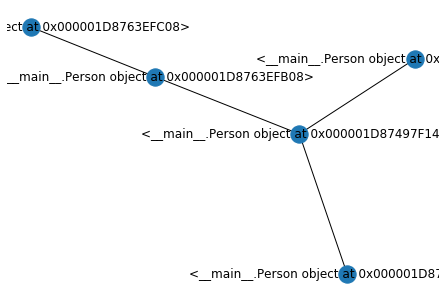

In [24]:
# Try this

import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline 

social_network = nx.Graph([(1,3), (2,3), (3,4), (4,5)])

class Person: 
    def __init__(self, name, age, gender):
        self.name = name
        self.age = age
        self.gender = gender
    
population = [Person("Brendan",43,"M"),Person("Julie",80,"F"),Person("Hugo",49,"M"),Person("Salma",7,"F"),Person("Arham",54,"F")]

mapping = {1: population[0], 2: population[1], 3: population[2], 4: population[3], 5: population[4]}

social_network = nx.relabel_nodes(social_network, mapping)

nx.draw(social_network, with_labels=True)

__Exercise:__ How can we change the labels so that they show the names of the people in the visualisation?

There are 2 ways that we can show the names in the visualisations: 

__Method 1: Change the network completely__

We could relabel the label with the names only. This means 
```python
mapping = {1: population[0].name, 2: population[1].name, 3: population[2].name, 4: population[3].name, 5: population[4].name}

social_network = nx.relabel_nodes(social_network, mapping)
```

__Method 2: Change the network completely__
If you want to retain the network structure, then you can pause the `.draw()` method to show label then draw the labels separately. This is how you do it: 
```python
# Need to set the positions first
pos = nx.random_layout(social_network)
nx.draw(social_network, pos=pos, with_labels=False)

labels = {population[0]: population[0].name, population[1]: population[1].name, population[2]: population[2].name, population[3]: population[3].name, population[4]: population[4].name}

nx.draw_networkx_labels(social_network,pos,labels)
```


In [ ]:
# Your code below


Let's look at the other method, which is about __attributes__ of the nodes. In week 6 we have looked into classes, where everything in Python are objects. Objects have attributes to describe them. For example, as a person we are described by our names, age, gender and et cetera. 

We can do the same thing with network nodes, and with `networkx` it is easier to do so with their built-in methods. But first, we can add node attributes when we create the nodes. 
```python
social_network = nx.Graph()

social_network.add_node("Brendan", {'age': 43, gender: "M"})
```
Note, we must define the graph object first, then add the node attributes. The above example comes from previous exercise. We can easily see that: 
* The node is defined by the name of the person. In this case it is fine. However, in reality people share the same names. `network` identify the nodes by its name, it is recommended to create a unique identifer if possible. 
* The personal information are listed as dictionaries.
    * The feature is shown as the keys. 
    * The values are listed under each keys, which belongs to each person. 

__Exercise:__ Can you create the nodes with attributes followed from the previous exercise? The personal information of others are shown below. 

| Name  | Age | Gender |
|-------|-----|--------|
| Julie | 80  | F      |
| Hugo  | 49  | M      |
| Salma | 7   | F      |
| Arham | 54  | F      |

__Solution__

```python
social_network.add_node("Julie", {'age': 80, gender: "F"})
social_network.add_node("Hugo", {'age': 49, gender: "M"})
social_network.add_node("Salma", {'age': 7, gender: "F"})
social_network.add_node("Arham", {'age': 54, gender: "F"})
```

`networkx` also has a method called `.set_node_attributes()` which allows us to add/ edit nodes attributes if we wish. For example, if we appended a new person into the network, called Brian, without any information appended. We can simply write 
```python
social_network.add_node("Brian")
```
Later, we have learnt that Brian is a male and his age is $12$. We then can use `.set_node_attributes()` and write 
```python
nx.set_node_attributes(social_network, {"Brian": {'age': 12, gender: "M"}})
```
Beware the syntax difference from adding nodes. 

__Exercise:__ When you add a node, can you append incomplete attributes information?

For example, if I want to add a new node called `"Sally"` but I do not know her age, can I still use `nx.add_node()`?

__Answer:__ Yes, you can. 

__Exercise:__ What if I realised Brian is aged $35$, can I simply change the attribute data with `nx.set_node_attributes()`?

__Answer:__ Yes, you can. 

To access the attribute values, we use the dictionary syntax. For example, to get the age of Brendan we could write 
```python
social_network.nodes['Brendan']['age']
```

__Exercise:__ Write a code that will print Brendan's gender. 

In [ ]:
# Solution 

print(social_network.nodes['Brendan']['gender'])  # print() is fine in Jupyter

In [ ]:
# Your code below 

print(???)

## EDA on Network Data

Finally, let us apply our skills by exploring the data and model them as networks. As a recap, EDA stands for exploratory data analysis. Which simply means we explore the dataset to extract the values and improve the data quality before finding useful patterns. 

In this section, we will look at 3 steps: 
1. Read the data files
2. Clean the data set
3. Explore the data, in particular
    * Visualise the network
    * Find statistical summaries from network

In this exercise, we will look at a data set of pokemon data. Pokemon is a game where player controls creatures to fight with other players. It is the most popular franchise in the world to date. One of the features of this game is each Pokemon creatures has a type, and depending of the type your Pokemon may hit twice of the damage, so called strongly effective. 

Our aim is to visualise the types which are effective to each other. 

One easy example is the 3 basic types: Fire is effective on grass type. Grass is effective on water type. Water is effective on fire type. The cyclic relationship looks like paper, scisors, rock: Each type is over the other, and so forth. In the following, we make a toy example out of adjacent matrix. Adjacent matrix represents nodes as columns and rows. In the following you can see red dot means fire. So the top red dot means the first column is when the fire type is being attacked. The first row represents the fire type is attacking therefore. 

Adjacent matrix has 1's and 0's, meaning there is a line from the node row to the node column. This is depicted below. 

<img src="fig/pokeType.png"/>

So you can see water type is effective to fire type and so on. Now we can try the network generation based on adjacent matrix below. 

In [6]:
import numpy as np
adj_matrix = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]])

Once we have the data, we first create an empty graph and put the data into it. We use `nx.from_numpy_array()` where this accepts the adjacent matrix. 

In [7]:
import networkx as nx

example_graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

Finally we can draw the network. 

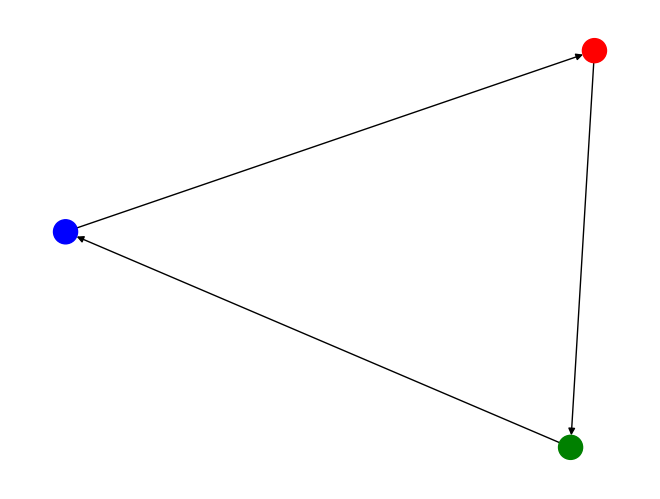

In [10]:
nx.draw(example_graph, node_color=["red", "blue", "green"])

You can see above the nodes have been coloured using the option `node_color`. It accepts list and the order corresponds to the order of the nodes. We will look at this next. 

__Exercise:__ Read the data file called `pokemon_Types.csv`. This data file is located in the `files` folder. It is a spreadsheet, so you may need `pd.read_csv()` for this exercise. After that, print all column names. 

Explain what each columns means. 

In [ ]:
import pandas as pd
# Your code below 

types_df = 

In [69]:
# Solution
import pandas as pd
types_df = pd.read_csv('files/pokemon_Types.csv')

print(pokemon_df.columns)

Index(['Type', 'Strong against', 'Inffective against', 'Inoffensible against'], dtype='object')


For the purpose of this exercise, we do not require any data cleaning. We will need to filter the relevant columns. 

We then create the empty graph. This time because we are trying to see which type is effective than other so we use directional graph `nx.DiGraph()` where the edges have directions. 

In [70]:
# Run this
types_net = nx.DiGraph()

Other types of graphs are:
* `nx.Graph()` undirected graph. 
* `nx.MultiGraph()` undirected graph with self loops and parallel edges. 
* `nx.MultiDiGraph()` directed graph with self loops and parallel edges. 

We then try to add the nodes (i.e. pokemon types) into the graph. To do this, we need to fetch data from the data frame. The next exercise is where you develop the network. 

In [ ]:
# Try this
types_net.add_node("Normal")

There are many types and the best way is to write a loop with `.add_node()` method. 

Because this is a test, we shall remove the node as below. 

In [ ]:
# Try this
types_net.remove_node("Normal")

If you are running out of ideas, that is fine. There is one solution and we will walk through this one. 

The main idea is to __create a list for all links__, then we can include all singletons into the network as well. Remember our `Graph()` object starts with nothing, so must consider different cases. 

__Exercise:__ Write a loop to generate the nodes in the type network. 

In [ ]:
# Your code below


In [72]:
# Solution
for type_name in types_df['Type']: 
    types_net.add_node(type_name,label=type_name)

NodeView(('Normal', 'Fire', 'Water', 'Grass', 'Flying', 'Fighting', 'Poison', 'Electric', 'Ground', 'Rock', 'Psychic', 'Ice', 'Bug', 'Ghost', 'Steel', 'Dragon', 'Dark', 'Fairy'))

Next, let us create the edges (i.e. the links). There are 2 methods to add the edges:
* `.add_edge()`
* `.add_edges_from()`

You can read the documentations from NetworkX official site. 

__Exercise:__ Which one is the most effeicient to use? Read the data again if you need. 

__Answer:__ In column `"Strong against"` it is deliminated by space to show it is multi-value. So `.add_edges_from()` would save us time by looping each source type to what it is effectively against with. 

You can run the below code to generate the edges. 

In [74]:
# Run this
types_ls = types_df['Type'].to_numpy()
strong_at = [x.split(' ') for x in types_df['Strong against'].fillna('').to_numpy()]

i = 0
for type_name in types_ls: 
    types_net.add_node(type_name,label=type_name)
    types_net.add_edges_from([(type_name,other_type_name) for other_type_name in strong_at[i]])
    i += 1

['Normal' 'Fire' 'Water' 'Grass' 'Flying' 'Fighting' 'Poison' 'Electric'
 'Ground' 'Rock' 'Psychic' 'Ice' 'Bug' 'Ghost' 'Steel' 'Dragon' 'Dark'
 'Fairy']


Next is we shall colour the nodes. What we will do is to create a dictionary to capture which type has which colour. After that we translate the colours to a list. 

We will need to use a loop here. The syntax of looping nodes is:
```python
g = nx.Graph()

for node in g.nodes:
    print(node)
```

In [75]:
type_colours = {"Normal": "#D2CBBE", "Fire": "#E5340E", "Water": "#0E7BE5", "Grass": "#82E150", "Flying": "#84ADFB", "Fighting": "#9E5F54", "Poison": "#601E62", "Electric": "#FBEA20", "Ground": "#E3D070", "Rock": "#E6AD2E", "Psychic": "#F62B99", "Ice": "#70F3F4", "Bug": "#D4E278", "Ghost": "#654FB2", "Steel": "#C0C0C0", "Dragon": "#6253E3", "Dark": "#827674", "Fairy": "#F9BCC8"}

color_map = []
for node in types_net.nodes: 
    try:
        color_map.append(type_colours[node])
    except KeyError:
        color_map.append('#1f78b4')

Finally, we can visualise the network itself. 

__Exercise:__ Visualise the network with the types as labels and colour them as well. Use the documentations to help you. 

In [ ]:
plt.figure(figsize=(20,20))
# Your code below


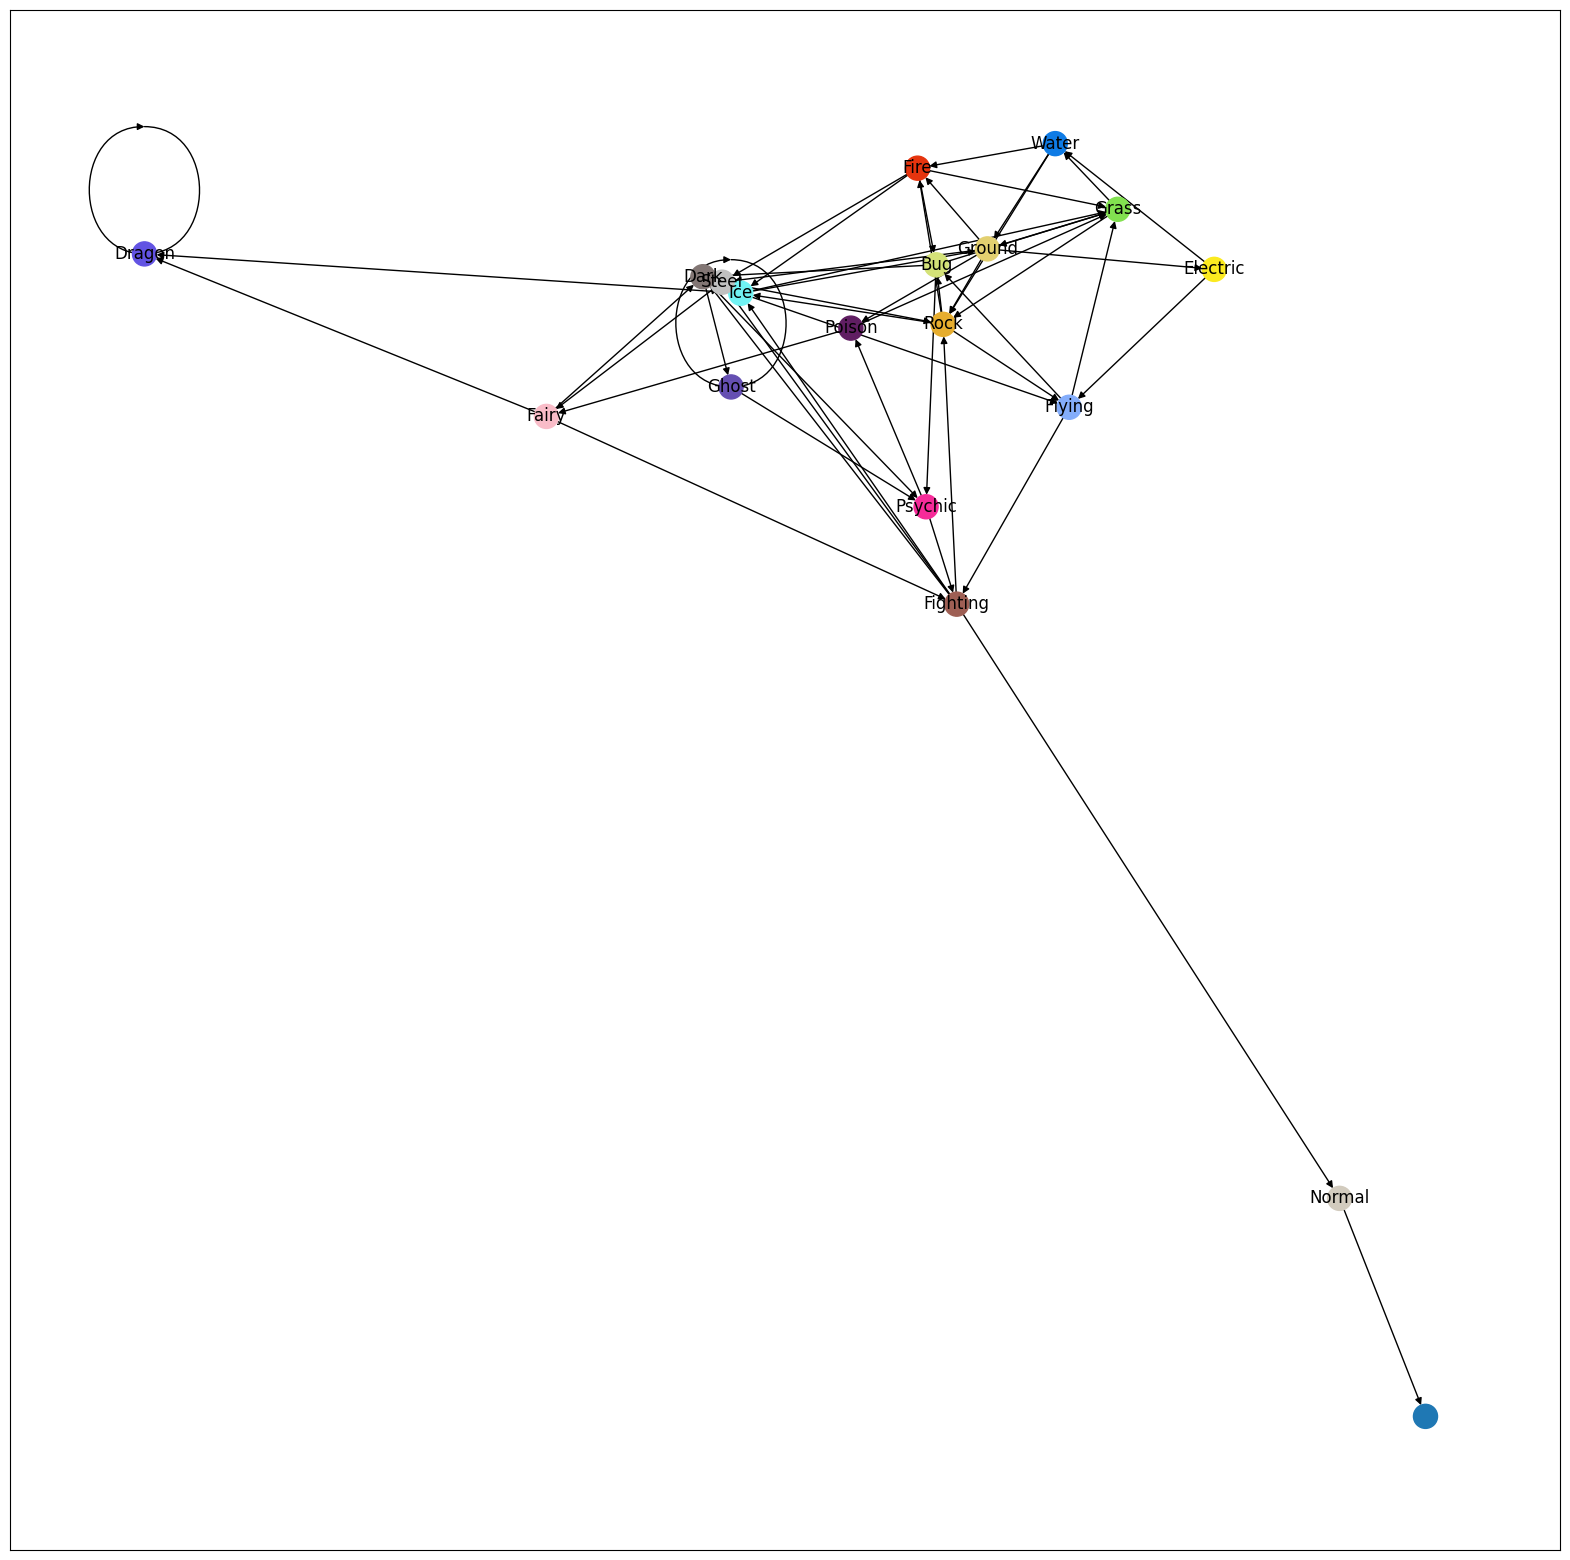

In [77]:
# Solution
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,20))
nx.draw_networkx(types_net, with_labels = True, node_color=color_map)
plt.show()

Finally you may do some analysis of the network. For example, you can find how many singletons in the network. You may also infer the centrality values from the network. The visualisation has many different customisations such as, layouts, node size etc. 

## Conclusion

In today's class we have looked at: 
* How to visualise networks in Python
* Inferring Python with simple measures
* Explore datasets and model them with network. 